In [97]:
%cd '/content/drive/Othercomputers/My MacBook Air/CSE 847 Machine Learninng/Project'
from IPython.display import clear_output
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
clear_output()

import os

In [98]:
df = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
df.head()
os.makedirs("plots", exist_ok=True)

In [99]:
selected_columns = df.columns[11:].tolist()

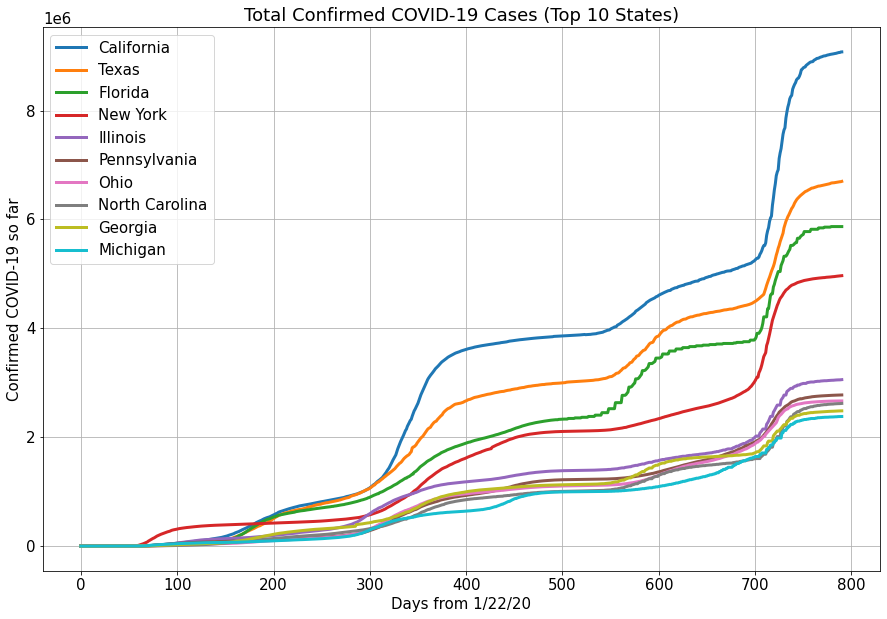

In [150]:
states = list(set(df['Province_State']))
state_stat = {}
state_total = []

for state in states:
# state = "Alabama"
    df_st = df[df['Province_State'] == state]
    total = df_st.sum()[selected_columns].values
    state_stat[state] = total
    state_total.append((state, total[-1]))


# Sorting all the States based on Total Cases so far

def Sort_Tuple(tup, reverse= False): 
    """
    Function to sort a list of touple with second element
    """
    if reverse:
        tup.sort(key = lambda x: x[1], reverse=True)
    else:
        tup.sort(key = lambda x: x[1], reverse=False)

    return tup 
  
# printing the sorted list of tuples
top_states = Sort_Tuple(state_total, reverse=True)


top = 10
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 15
for state, total in top_states[:top]:
    plt.plot(state_stat[state], label=state, linewidth=3)
plt.legend()
plt.title('Total Confirmed COVID-19 Cases (Top 10 States)')
plt.xlabel('Days from 1/22/20')
plt.ylabel("Confirmed COVID-19 so far")
plt.grid()
plt.savefig(f'plots/total_confirmed-top-{top}.png', dpi=200)

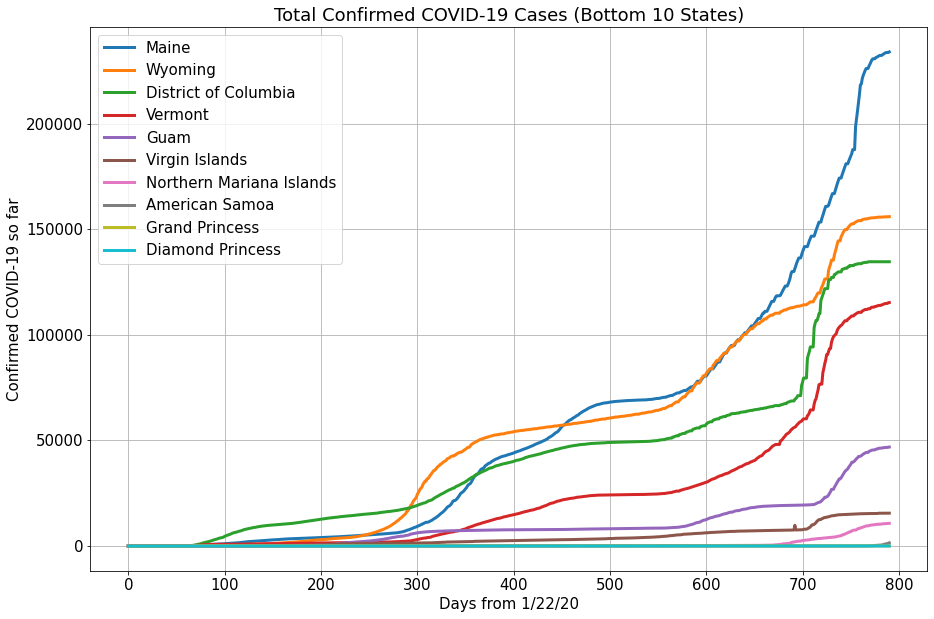

In [151]:
bottom = 10
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 15
for state, total in top_states[-bottom:]:
    plt.plot(state_stat[state], label=state, linewidth=3)
plt.legend()
plt.title('Total Confirmed COVID-19 Cases (Bottom 10 States)')
plt.xlabel('Days from 1/22/20')
plt.ylabel("Confirmed COVID-19 so far")
plt.grid()
plt.savefig(f'plots/total_confirmed-bottom-{bottom}.png', dpi=200)

### Calculating New Cases Everyday


In [126]:
df_newcase = df[df.columns[:12]].copy()
for i in range(11, 801):
    today = df.columns[i+1]
    yesterday = df.columns[i]
    df_newcase[today] = df[today] -df[yesterday]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [127]:
states = list(set(df_newcase['Province_State']))
state_stat = {}

for state in states:
# state = "Alabama"
    df_st = df_newcase[df_newcase['Province_State'] == state]
    state_stat[state] = df_st.sum()[selected_columns].values

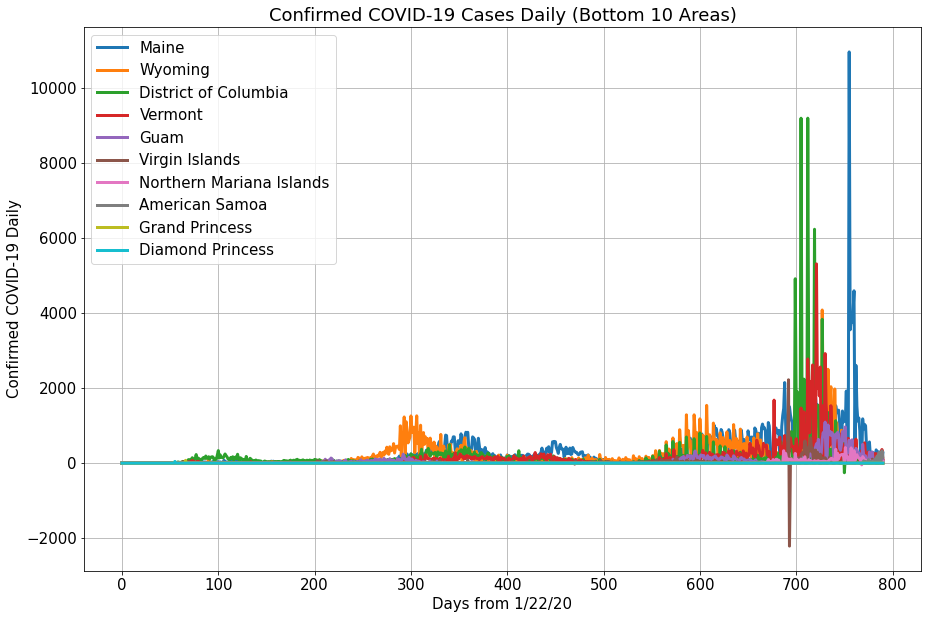

In [149]:
bottom=10
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 15
for state, total in top_states[-bottom:]:
    plt.plot(state_stat[state], label=state, linewidth=3)
plt.title('Confirmed COVID-19 Cases Daily (Bottom 10 Areas)')
plt.xlabel('Days from 1/22/20')
plt.ylabel("Confirmed COVID-19 Daily")
plt.grid()
plt.legend()
plt.grid()
plt.grid()
plt.savefig(f'plots/daily_confirmed-bottom-{bottom}.png', dpi=200)

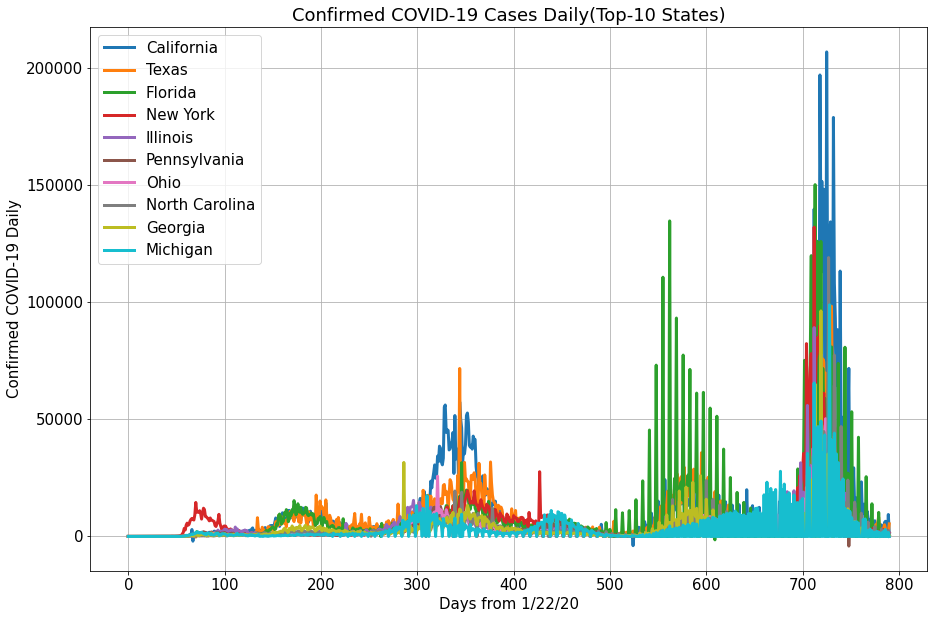

In [148]:
top=10
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 15
for state, total in top_states[:top]:
    plt.plot(state_stat[state], label=state, linewidth=3)
plt.title('Confirmed COVID-19 Cases Daily(Top-10 States)')
plt.xlabel('Days from 1/22/20')
plt.ylabel("Confirmed COVID-19 Daily")
plt.grid()
plt.legend()
plt.grid()
plt.grid()
plt.savefig(f'plots/daily_confirmed-top-{top}.png', dpi=200)

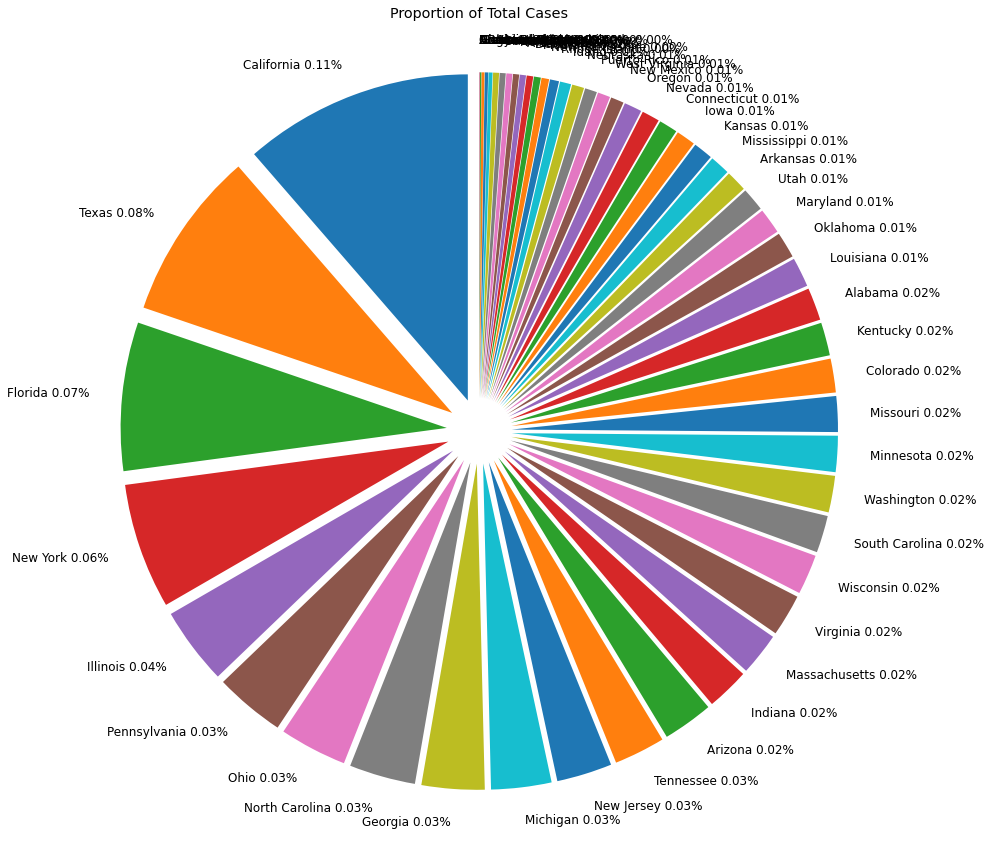

In [152]:
plt.figure(figsize=(15,15))
y, labels, explode = [], [], []
plt.rcParams['font.size'] = 12
total_us = df[df.columns[-1]].sum()
for state, total in top_states:
    y.append(total)
    labels.append(f"{state} {total/total_us:.2f}%")
    explode.append(0.1)

plt.pie(y, explode =explode, labels = labels, startangle = 90)
plt.title("Proportion of Total Cases")
plt.savefig("plots/total_proportion.png", dpi=200)